In [1]:
%matplotlib inline

In [2]:
cd ../src

/Users/williamferreira/Dropbox/mscproject/src


In [66]:
from model.utils import get_dataset, get_tokenized_lemmas, get_stanparse_depths
from model.baseline.transforms import _hedging_seed_words, _refuting_seed_words

In [4]:
df = get_dataset()

In [14]:
df_qm = df[df.articleHeadline.str.contains('\?')]

In [15]:
qm_stats = df_qm.articleHeadlineStance.value_counts() / df_qm.articleHeadlineStance.value_counts().sum() * 100

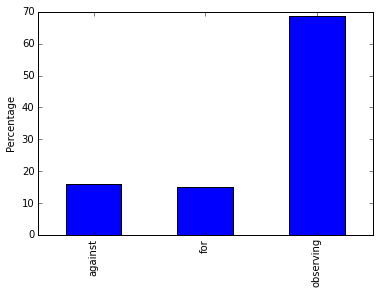

In [61]:
ax = qm_stats.iloc[np.argsort(qm_stats.index)].plot(kind='bar', sort_columns=True)
ax.set_ylabel("Percentage")

In [19]:
df_hw = df.copy()

In [20]:
df_hw['has_hw'] = 0

In [27]:
for i, r in df_hw.iterrows():
    if len(set(get_tokenized_lemmas(r.articleHeadline)).intersection(_hedging_seed_words)) > 0:
        df_hw.ix[i, ['has_hw']] = 1

In [31]:
df_has_hw = df_hw[df_hw.has_hw == 1]

In [32]:
has_hw_stats = df_has_hw.articleHeadlineStance.value_counts() / df_has_hw.articleHeadlineStance.value_counts().sum() * 100

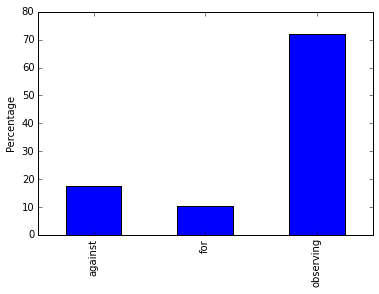

In [62]:
ax = has_hw_stats.iloc[np.argsort(has_hw_stats.index)].plot(kind='bar', sort_columns=True)
ax.set_ylabel("Percentage")

In [39]:
df_rw = df.copy()

In [40]:
df_rw['has_rw'] = 0

In [41]:
for i, r in df_hw.iterrows():
    if len(set(get_tokenized_lemmas(r.articleHeadline)).intersection(_refuting_seed_words)) > 0:
        df_rw.ix[i, ['has_rw']] = 1

In [42]:
df_has_rw = df_rw[df_rw.has_rw == 1]

In [43]:
has_rw_stats = df_has_rw.articleHeadlineStance.value_counts() / df_has_rw.articleHeadlineStance.value_counts().sum() * 100

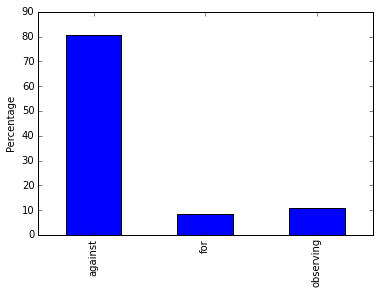

In [63]:
ax = has_rw_stats.iloc[np.argsort(has_rw_stats.index)].plot(kind='bar', sort_columns=False)
ax.set_ylabel("Percentage")

In [50]:
has_rw_stats

against      80.747126
observing    10.919540
for           8.333333
dtype: float64

In [52]:
has_rw_stats.iloc[[0, 2, 1]]

against      80.747126
for           8.333333
observing    10.919540
dtype: float64

In [53]:
import numpy as np

In [58]:
ind = np.argsort(has_rw_stats.index)

In [59]:
ind

array([0, 2, 1])

In [67]:
stanparse_depths = get_stanparse_depths()

In [69]:
stanparse_depths.values()[0]

{0: ({0: {4}, 3: {1, 2}, 4: {3, 8}, 8: {5, 6, 7, 11}, 11: {10}},
  {(0, 4): u'root',
   (3, 1): u'amod',
   (3, 2): u'nn',
   (4, 3): u'nsubj',
   (4, 8): u'xcomp',
   (8, 5): u'aux',
   (8, 6): u'cop',
   (8, 7): u'det',
   (8, 11): u'prep_in',
   (11, 10): u'nn'},
  {0: 0, 1: 3, 2: 3, 3: 2, 4: 1, 5: 3, 6: 3, 7: 3, 8: 2, 10: 4, 11: 3})}

In [70]:
from model.utils import get_ppdb_data

In [71]:
ppdb_data = get_ppdb_data()

In [75]:
from model.utils import get_hungarian_alignment_score_data

In [76]:
hungarian = get_hungarian_alignment_score_data()

In [96]:
c_id, a_id = hungarian.keys()[20]

In [97]:
hungarian[(c_id, a_id)]

([(1, 4), (2, 5), (3, 6), (4, 7), (5, 8), (7, 3), (11, 0), (12, 1), (13, 2)],
 7.5314033333333334)

In [83]:
from model.utils import get_stanparse_data

In [84]:
stan_data = get_stanparse_data()

In [ ]:
Brian Williams: No, Our Meteorologist Was Not Peeing on Live TV

In [ ]:
NBC meteorologist Mike Seidel was caught relieving himself on camera

In [100]:
stan_data[a_id]

{u'sentences': [{u'dependencies': [[u'root', u'ROOT-0', u'vacuum-2'],
    [u'nn', u'vacuum-2', u'Robot-1'],
    [u'amod', u'attacks-4', u'cleaner-3'],
    [u'dep', u'vacuum-2', u'attacks-4'],
    [u'nn', u'housewife-7', u'South-5'],
    [u'nn', u'housewife-7', u'Korea-6'],
    [u'poss', u'hair-9', u'housewife-7'],
    [u'dep', u'attacks-4', u'hair-9']],
   u'parsetree': u"(ROOT (NP (NP (NN Robot) (NN vacuum)) (NP (NP (JJR cleaner) (NNS attacks)) (NP (NP (NNP South) (NNP Korea) (NN housewife) (POS 's)) (NN hair)))))",
   u'text': u"Robot vacuum cleaner attacks South Korea housewife's hair",
   u'words': [[u'Robot',
     {u'CharacterOffsetBegin': u'0',
      u'CharacterOffsetEnd': u'5',
      u'Lemma': u'robot',
      u'NamedEntityTag': u'O',
      u'PartOfSpeech': u'NN'}],
    [u'vacuum',
     {u'CharacterOffsetBegin': u'6',
      u'CharacterOffsetEnd': u'12',
      u'Lemma': u'vacuum',
      u'NamedEntityTag': u'O',
      u'PartOfSpeech': u'NN'}],
    [u'cleaner',
     {u'CharacterOffs